In [1]:
import pandas as pd

file_path = r"C:\Users\User\Downloads\bank csv.csv"
df = pd.read_csv(file_path)

# Display the first few rows to check if it loaded correctly
print(df.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [27]:
print("Dataset Loaded. Shape:", df.shape)
df.head()

Dataset Loaded. Shape: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [29]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [31]:
df.replace('unknown', np.nan, inplace=True)
df.dropna(inplace=True)
print("\nAfter Dropping 'unknown' values, new shape:", df.shape)


After Dropping 'unknown' values, new shape: (41188, 21)


In [33]:
# c. Encode Categorical Variables
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

In [35]:
# 🔹 4. Feature Scaling
X = df.drop('y', axis=1)
y = df['y']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
# 🔹 5. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [39]:
# 🔹 6. Model Building
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
# 🔹 7. Performance Evaluation
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9129643117261471

Confusion Matrix:
 [[7042  261]
 [ 456  479]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.51      0.57       935

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238



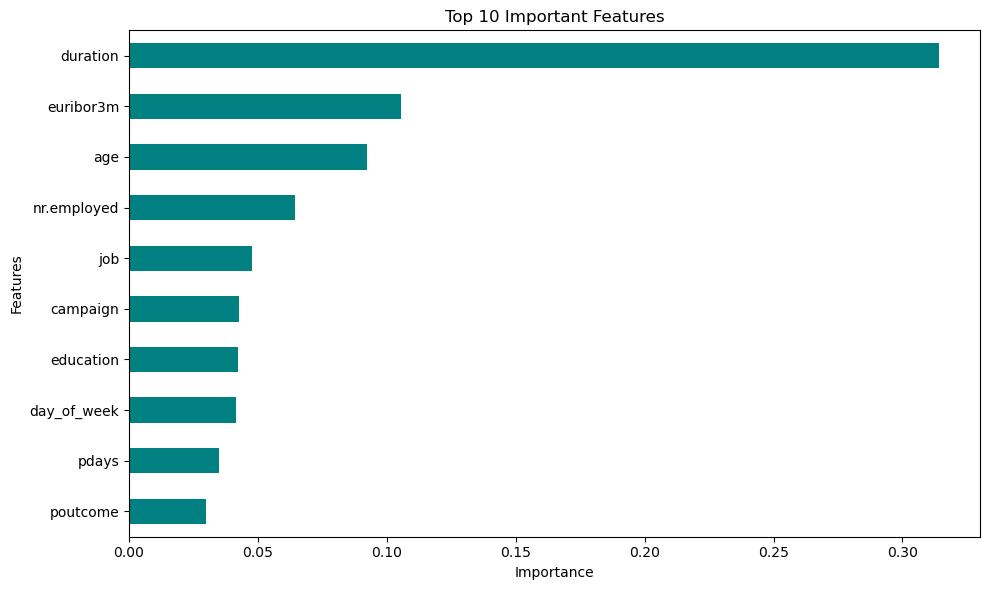

In [45]:
# 🔹 8. Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Important Features")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


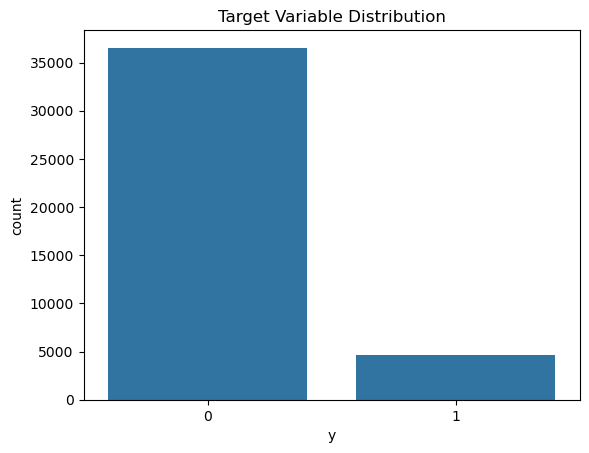

In [47]:
sns.countplot(x='y', data=df)
plt.title("Target Variable Distribution")
plt.show()


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(),
    'SVM': SVC()
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"{name} Accuracy: {acc:.4f}")


RandomForest Accuracy: 0.9153
LogisticRegression Accuracy: 0.9104
DecisionTree Accuracy: 0.8866
SVM Accuracy: 0.9096
